In [1]:
import os
from pathlib import Path
os.chdir(r"C:\Users\Mohad\Documents\Programming\NeuroPHorm")
import neurophorm as nf


In [3]:
OUTDIR = Path("examples/persistences")   # where data is loaded from
LABEL_STYLES = {
    "A": ("#1f77b4", "-"),
    "B": ("#ff7f0e", "--"),
}
HOMOLOGY_DIMS = [0, 1, 2]   # adjust to [0,1,2] if you computed H2 as well


In [4]:
data = nf.load_tda_results(
        output_directory=OUTDIR,
        load_all=False,
        load_betti=True,
        load_entropy=True,
        load_amplitude=True,
        include_all_betti_x=True,
        interpolate_betti_to_shared_x=True,
    )

[INFO] 2025-09-11 17:49:48,754 - neurophorm.persistence - load_tda_results: start | out_dir=examples\persistences | dataset_names=None | load_all=False
INFO | load_tda_results: start | out_dir=examples\persistences | dataset_names=None | load_all=False
[INFO] 2025-09-11 17:49:49,038 - neurophorm.persistence - load_tda_results: done | datasets_loaded=2
INFO | load_tda_results: done | datasets_loaded=2


In [5]:
data["A"].keys()

dict_keys(['betti_curves_original', 'betti_x_list', 'betti_curves_shared', 'betti_x_shared', 'persistence_entropy', 'wasserstein_amplitude', 'bottleneck_amplitude'])

[INFO] 2025-09-11 17:49:49,088 - neurophorm.visualization - plot_betti_curves: start | groups=None | dims=[0, 1, 2] | save=False(pdf) | show=True
INFO | plot_betti_curves: start | groups=None | dims=[0, 1, 2] | save=False(pdf) | show=True


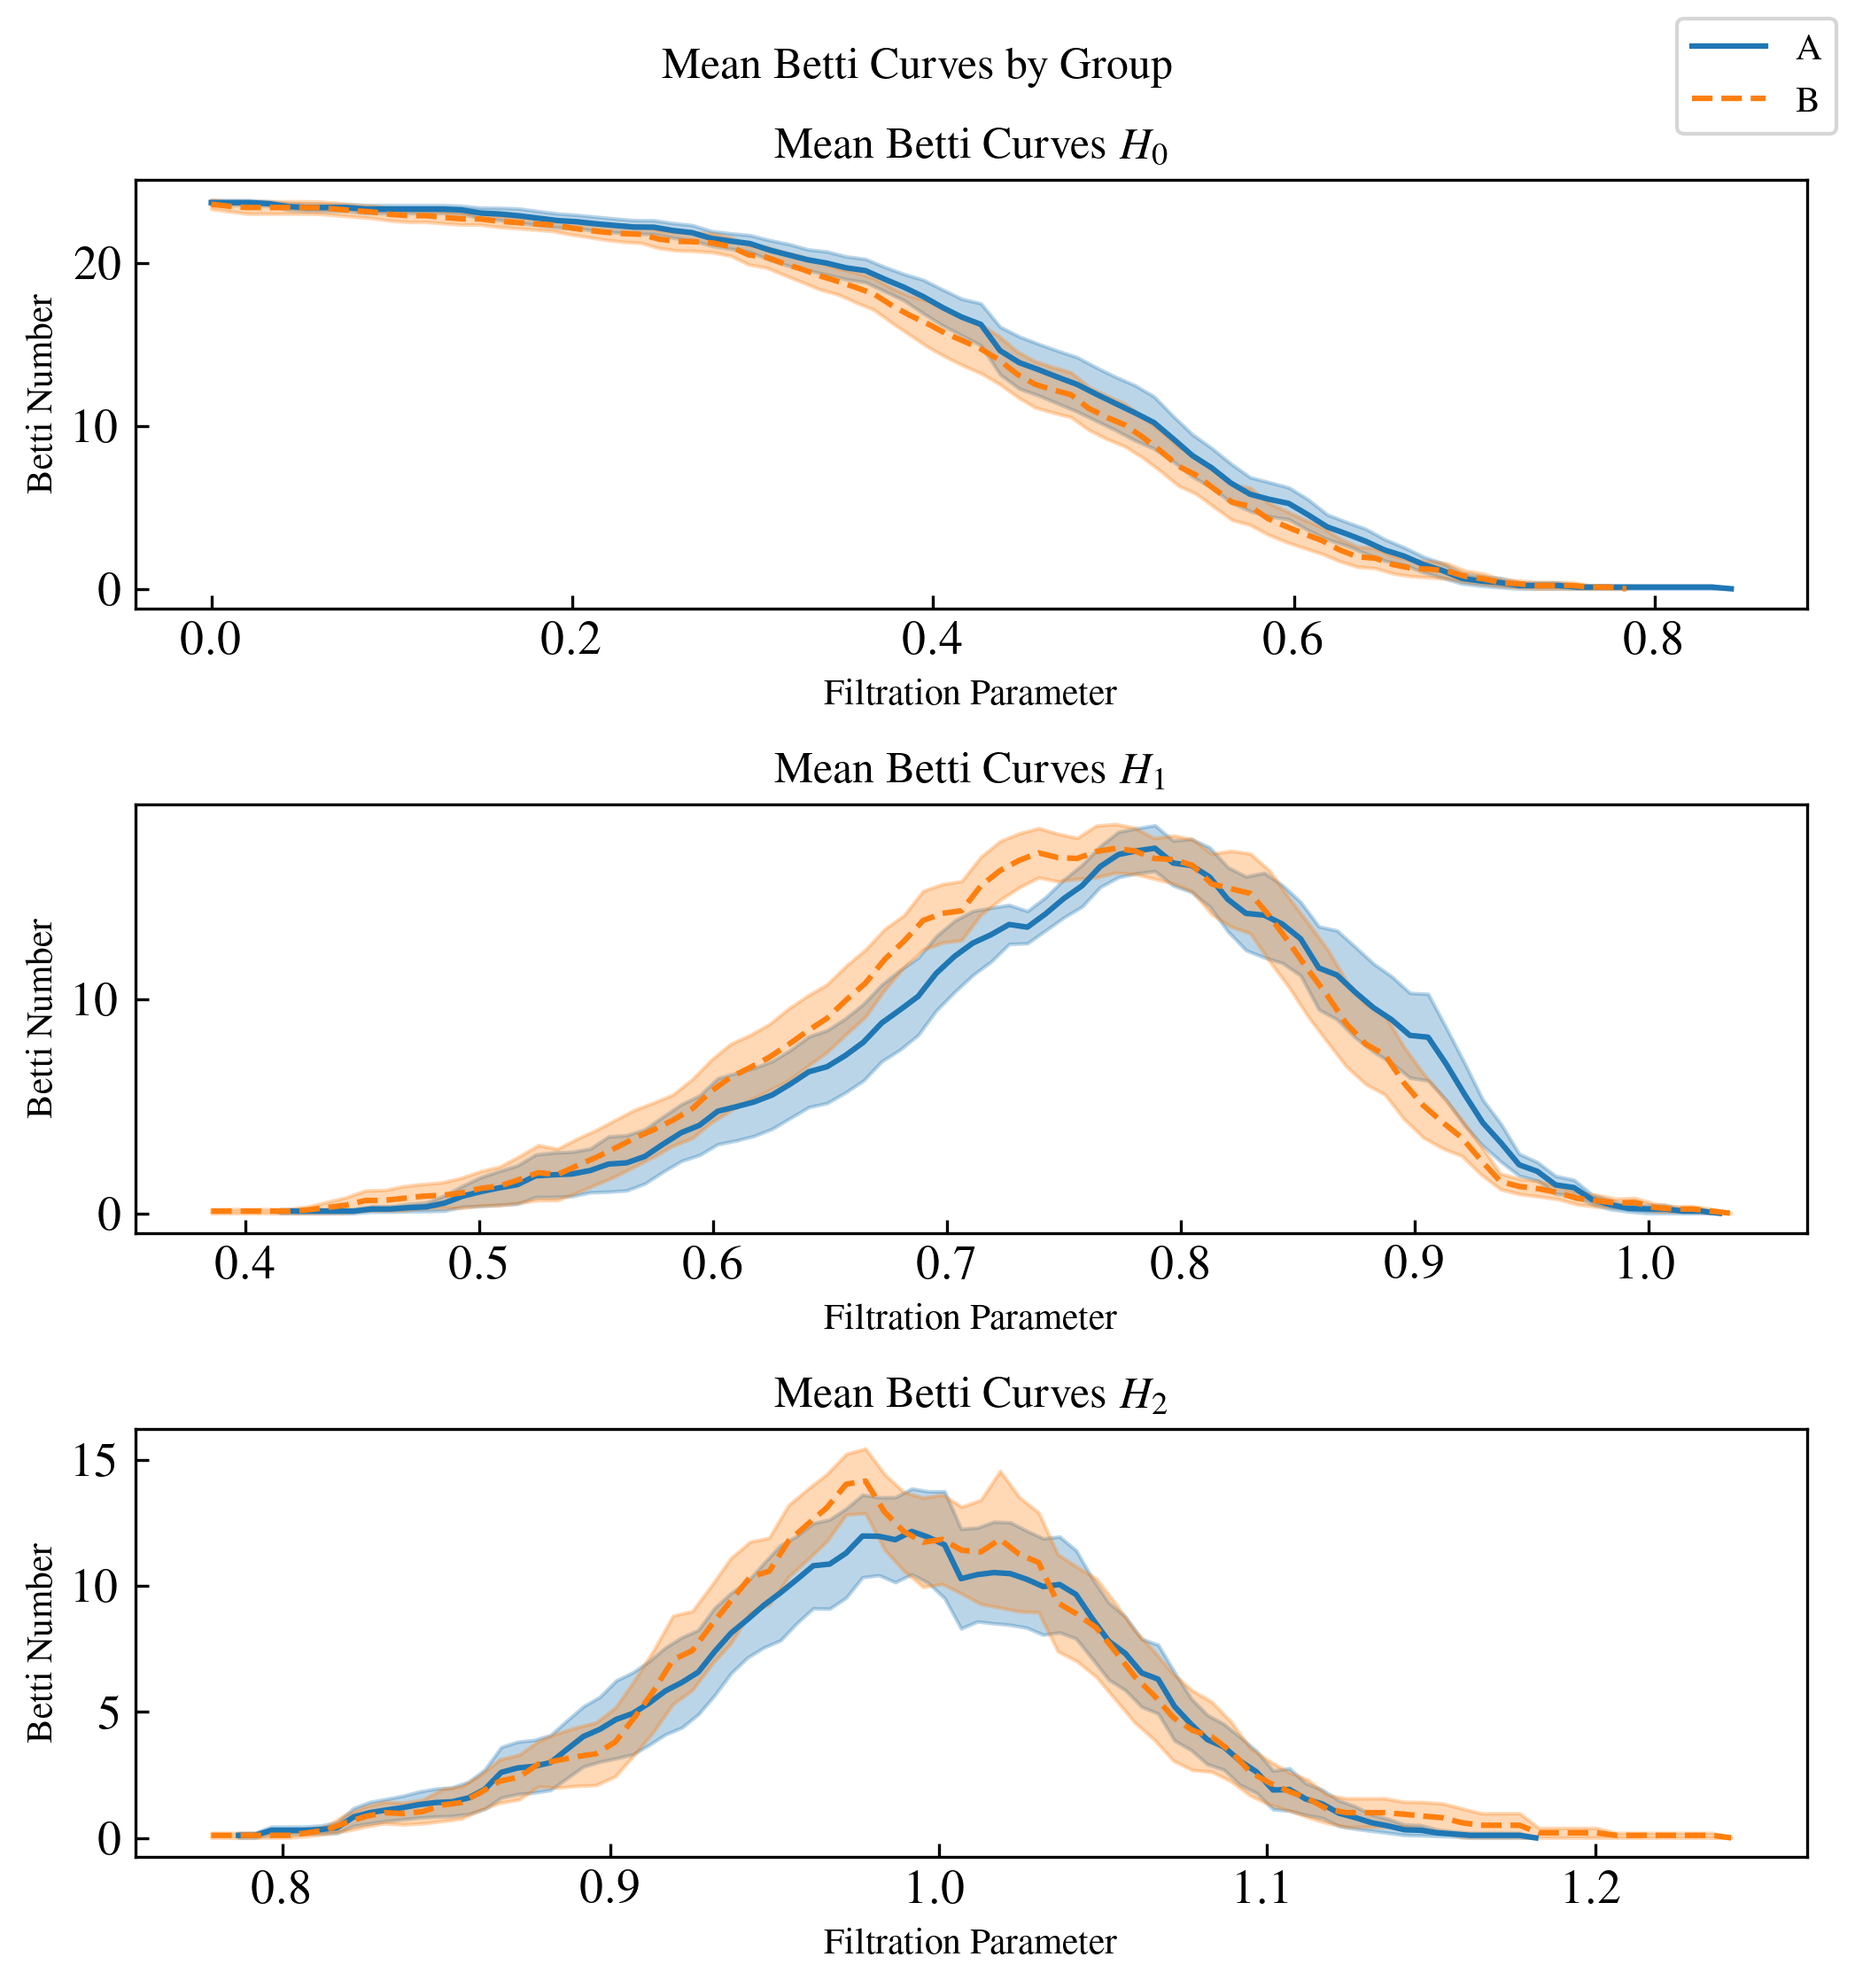

[INFO] 2025-09-11 17:49:49,941 - neurophorm.visualization - plot_betti_curves: done
INFO | plot_betti_curves: done


In [6]:
nf.plot_betti_curves(
        data,
        dimensions=HOMOLOGY_DIMS,
        label_styles=LABEL_STYLES,
    )

[INFO] 2025-09-11 17:49:49,961 - neurophorm.visualization - plot_p_values: start | feature=persistence_entropy | test=auto
INFO | plot_p_values: start | feature=persistence_entropy | test=auto


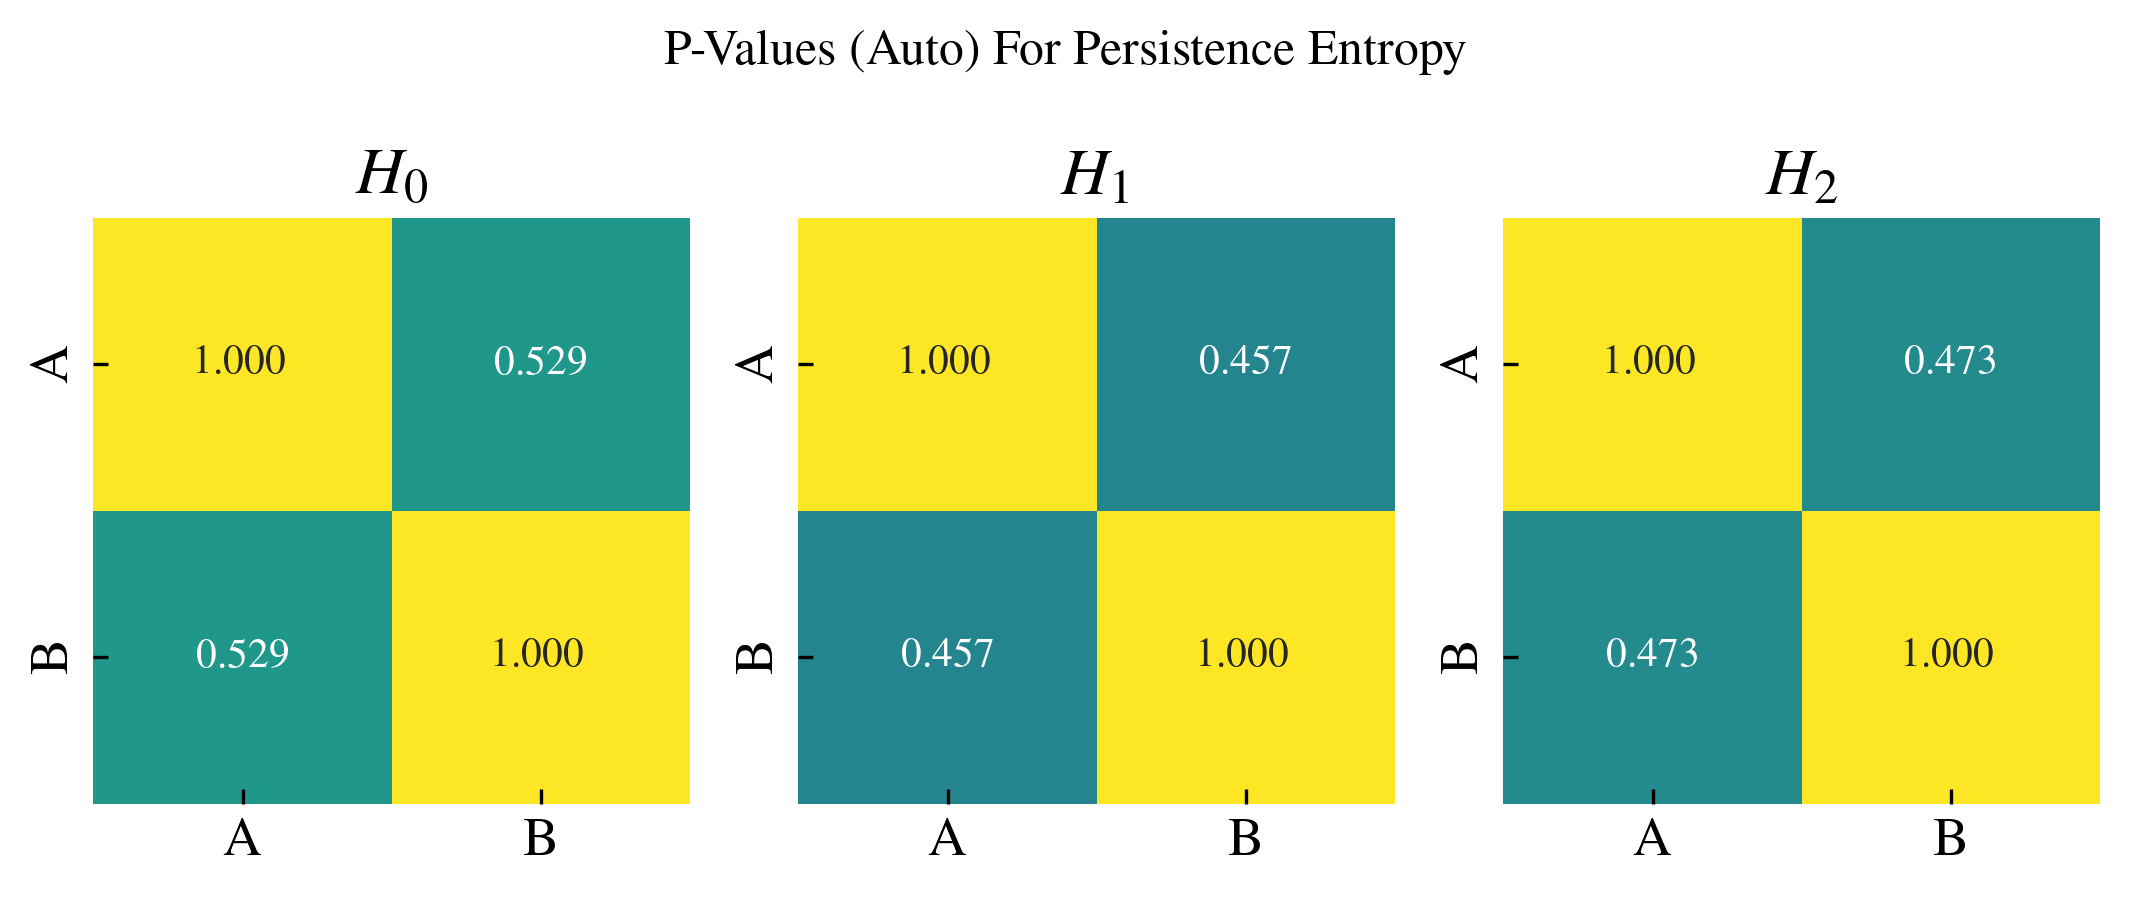

[INFO] 2025-09-11 17:49:50,752 - neurophorm.visualization - plot_p_values: done
INFO | plot_p_values: done


In [7]:
p = nf.plot_p_values(
        data,
        feature_name="persistence_entropy",
        dimensions=HOMOLOGY_DIMS,
        multitest="bonferroni",
    )

[INFO] 2025-09-11 17:49:50,777 - neurophorm.visualization - plot_swarm_violin: start | feature=wasserstein_amplitude | groups=None | dims=[0, 1] | split=True | save=False
INFO | plot_swarm_violin: start | feature=wasserstein_amplitude | groups=None | dims=[0, 1] | split=True | save=False
INFO | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings shou

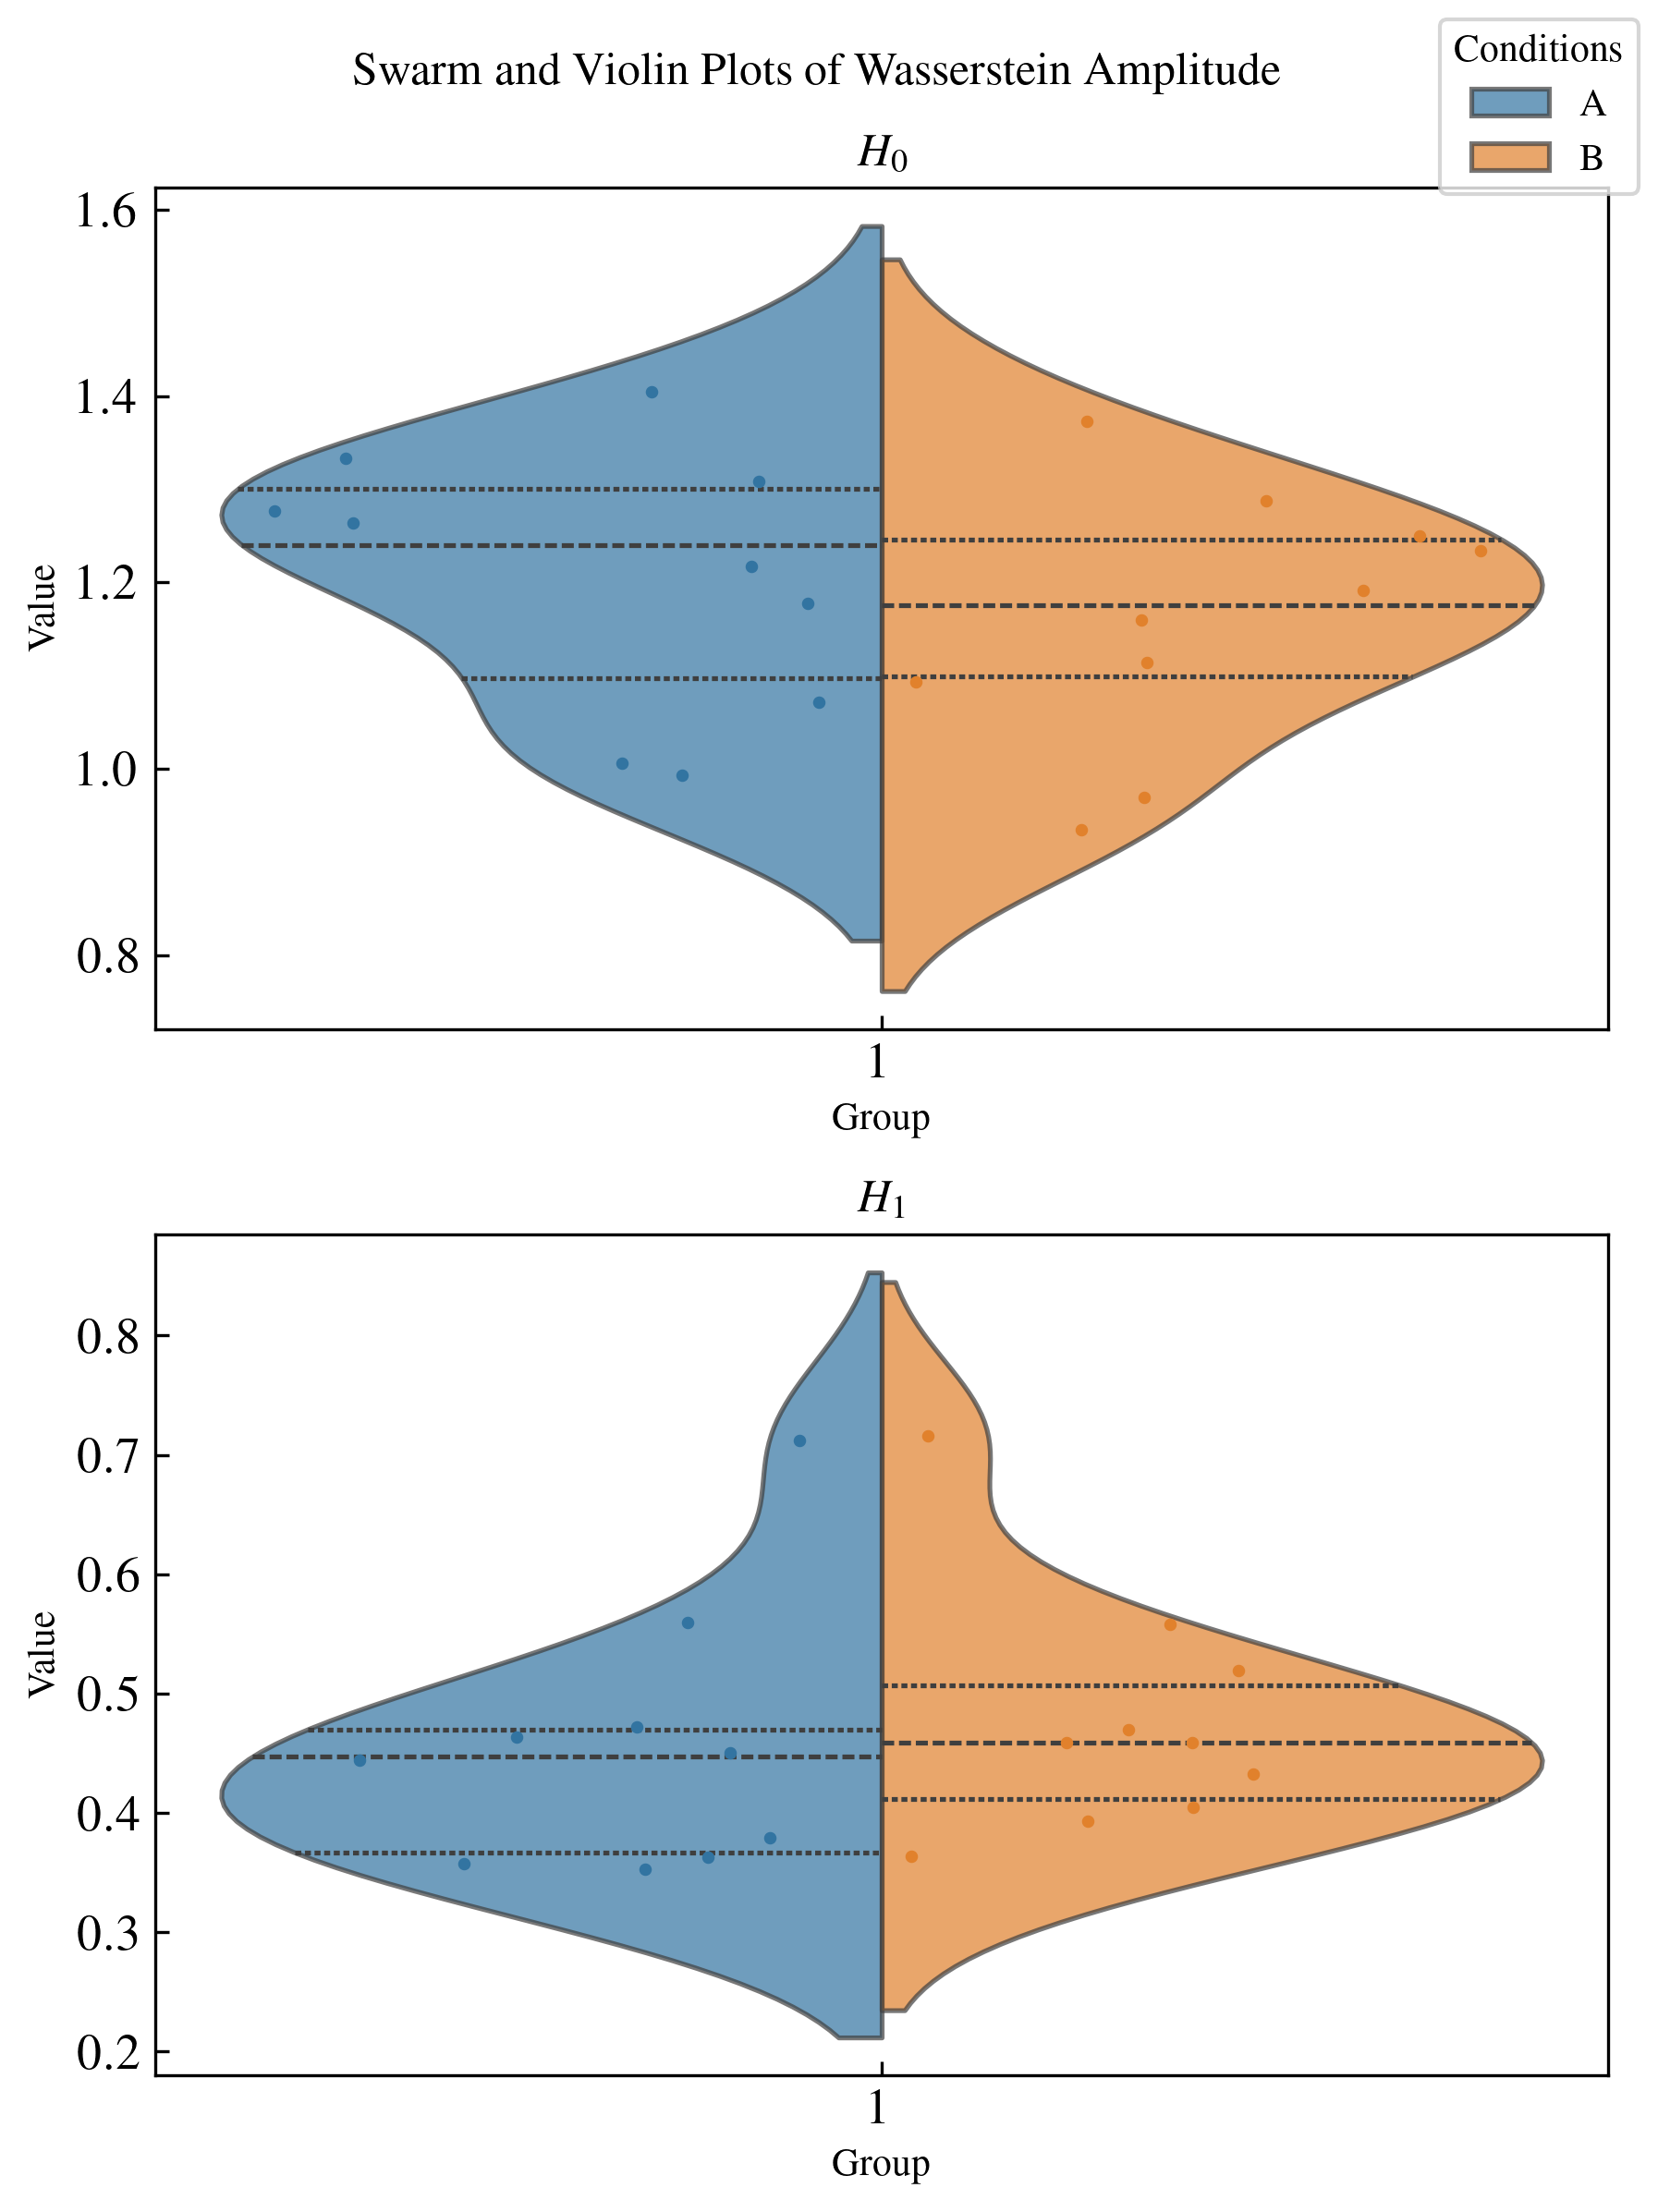

[INFO] 2025-09-11 17:49:51,566 - neurophorm.visualization - plot_swarm_violin: done
INFO | plot_swarm_violin: done


In [8]:
nf.plot_swarm_violin(
        data,
        feature_name="wasserstein_amplitude",
        dimensions=[0, 1],
        label_styles=LABEL_STYLES,
        figsize=(6,8),
        show_sig=True,
        split=True,
        groups={"A": ["A"],
                "B": ["B"],
                "Condition": ["1"]})

[INFO] 2025-09-11 17:49:51,582 - neurophorm.visualization - plot_kde_dist: start | feature=bottleneck_amplitude | groups=None | save=False
INFO | plot_kde_dist: start | feature=bottleneck_amplitude | groups=None | save=False


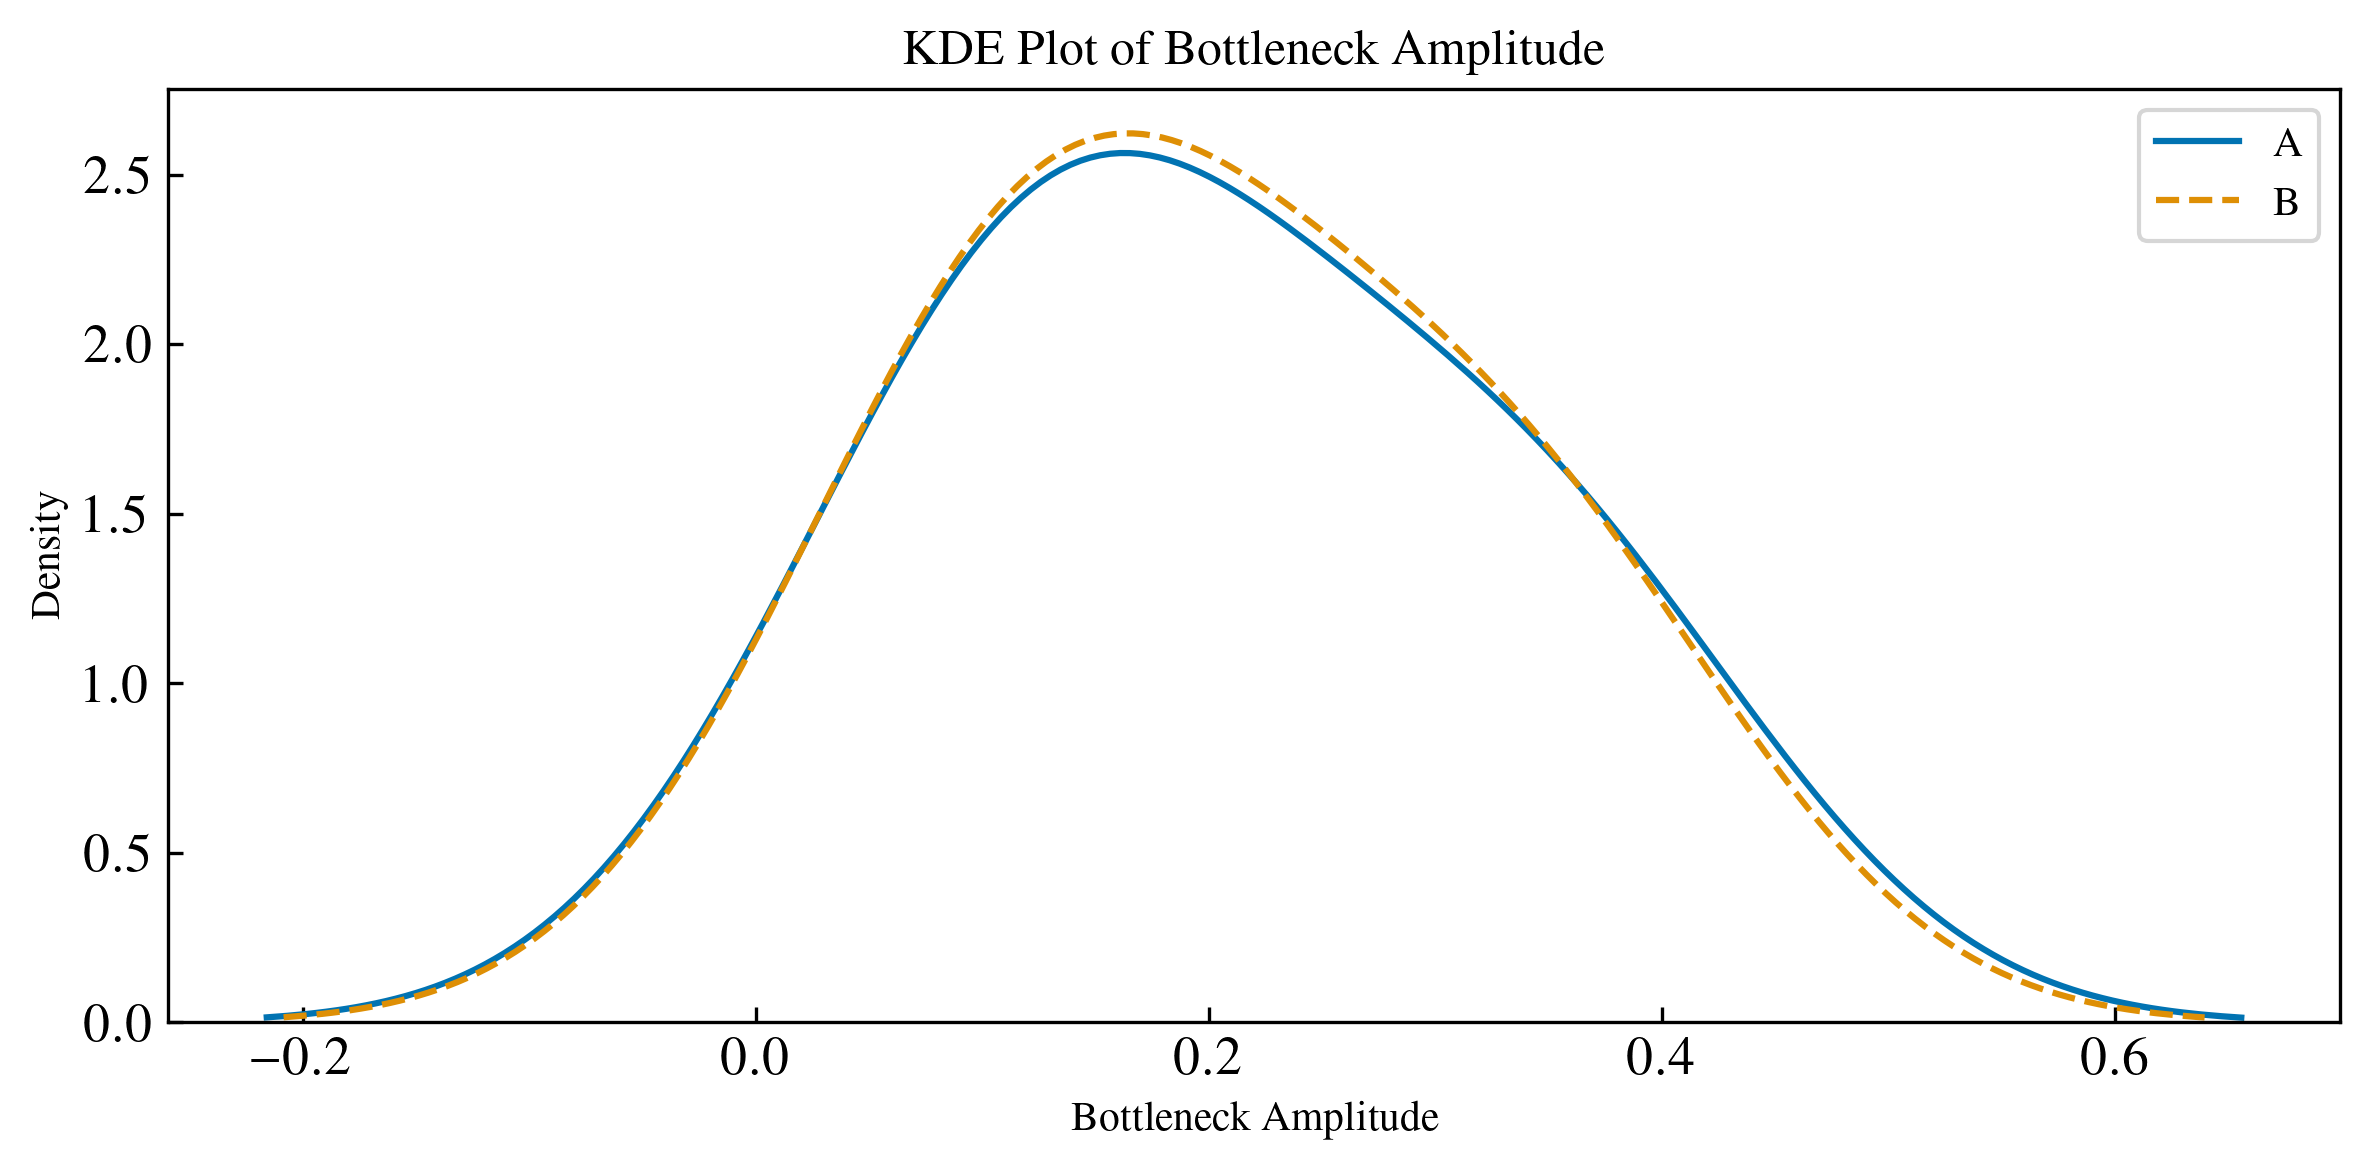

[INFO] 2025-09-11 17:49:51,979 - neurophorm.visualization - plot_kde_dist: done
INFO | plot_kde_dist: done


In [9]:
nf.plot_kde_dist(
        data,
        feature_name="bottleneck_amplitude",
)

In [10]:
betti = nf.compute_betti_stat_features(data)

[INFO] 2025-09-11 17:49:52,012 - neurophorm.persistence - compute_betti_stat_features: done | datasets=2
INFO | compute_betti_stat_features: done | datasets=2


[INFO] 2025-09-11 17:49:52,032 - neurophorm.visualization - plot_betti_stats_pvalues: start | feature=peak_y
INFO | plot_betti_stats_pvalues: start | feature=peak_y


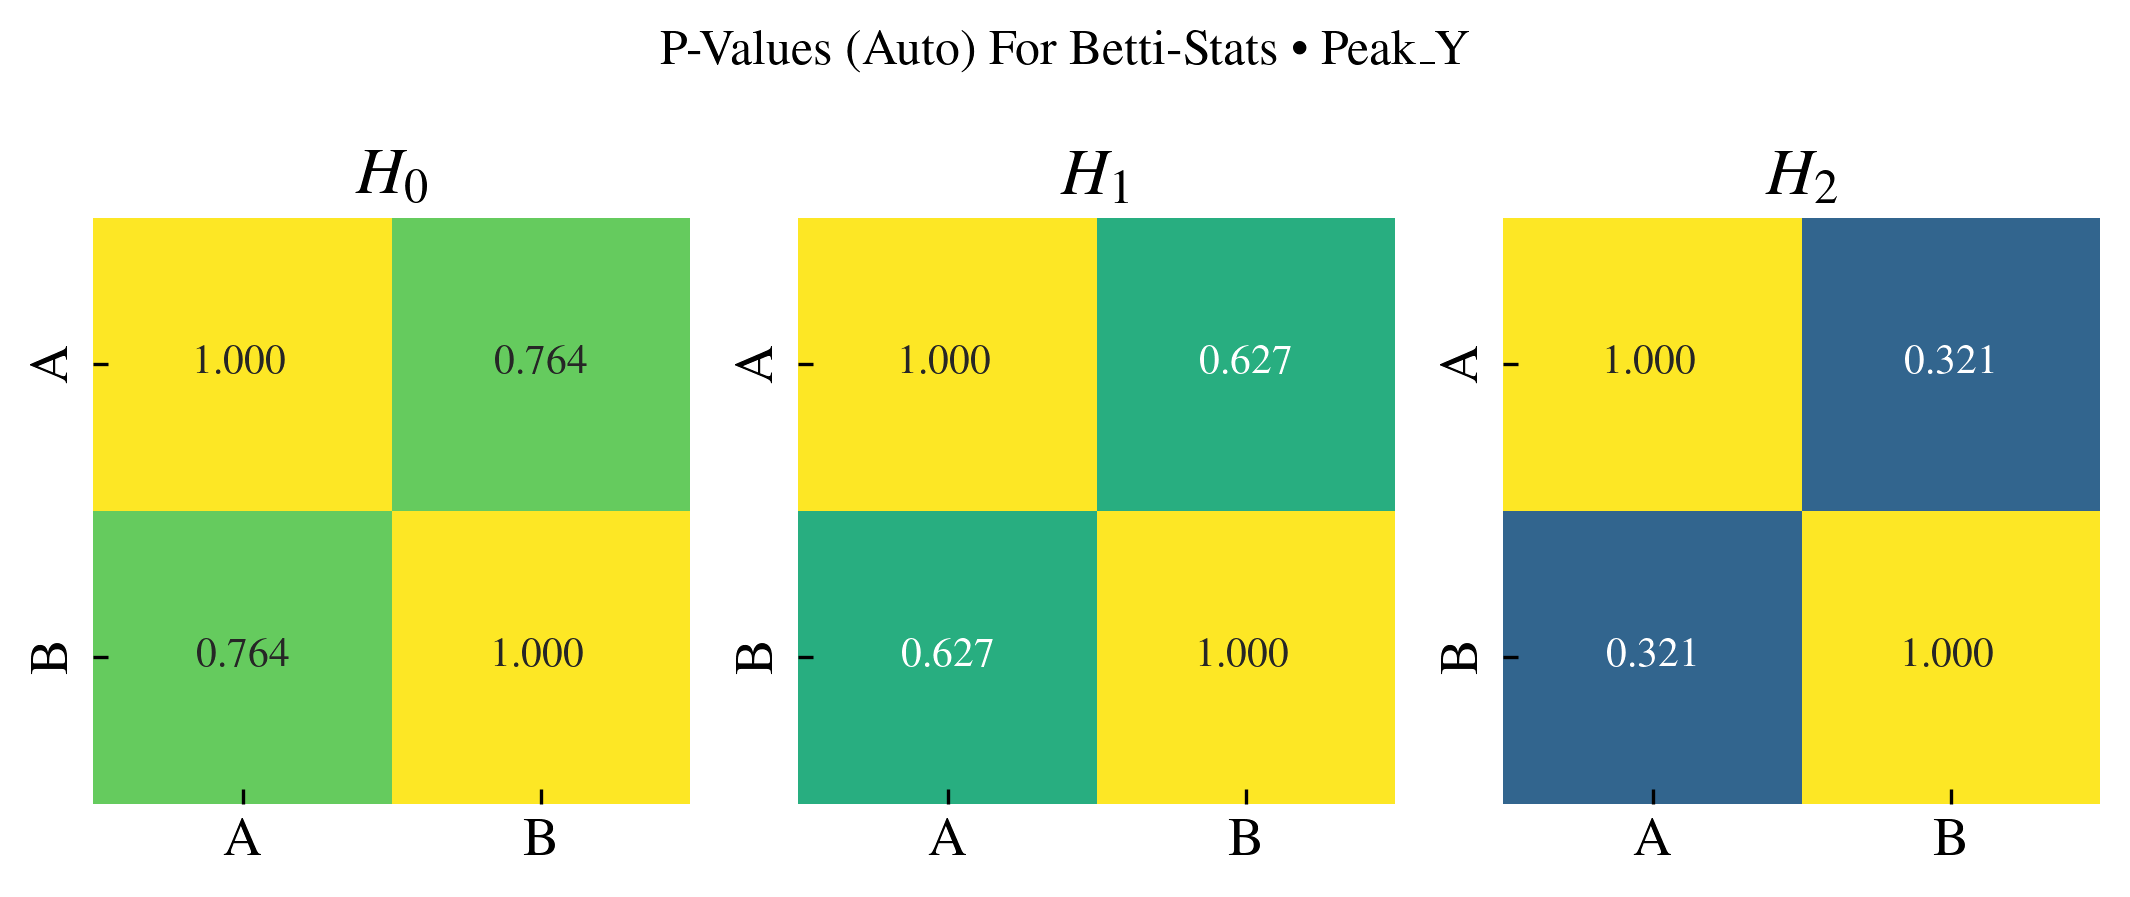

[INFO] 2025-09-11 17:49:52,773 - neurophorm.visualization - plot_betti_stats_pvalues: done
INFO | plot_betti_stats_pvalues: done


In [11]:
p_mats = nf.plot_betti_stats_pvalues(
    betti,
    feature_name="peak_y",
    multitest="bonferroni"
)